In [41]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, mutual_info_classif

In [42]:
column_names = ['class',
                'cap-shape',
                'cap-surface',
                'cap-color',
                'bruises',
                'odor',
                'gill-attachment',
                'gill-spacing',
                'gill-size',
                'gill-color',
                'stalk-shape',
                'stalk-root',
                'stalk-surface-above-ring',
                'stalk-surface-below-ring',
                'stalk-color-above-ring',
                'stalk-color-below-ring',
                'veil-type',
                'veil-color',
                'ring-number',
                'ring-type',
                'spore-print-color',
                'population',
                'habitat']

data = pd.read_csv('C:/Users/Adrian/Desktop/scripts/agaricus-lepiota.data', header=None,names=column_names)
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [44]:
data.shape

(8124, 23)

<Axes: xlabel='class', ylabel='odor'>

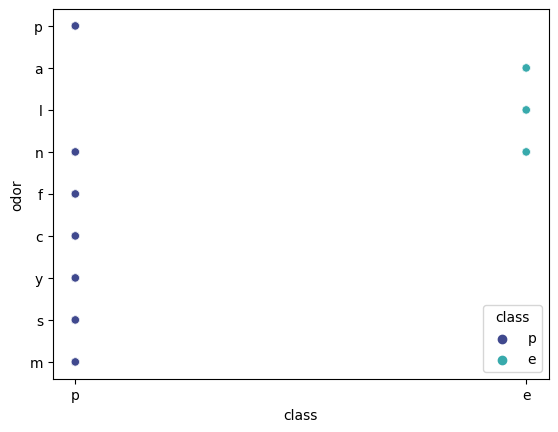

In [38]:
sns.scatterplot(x="class", y="odor", palette='mako', hue='class', data=data)
#Colors indicating edible and poisonous mushrooms

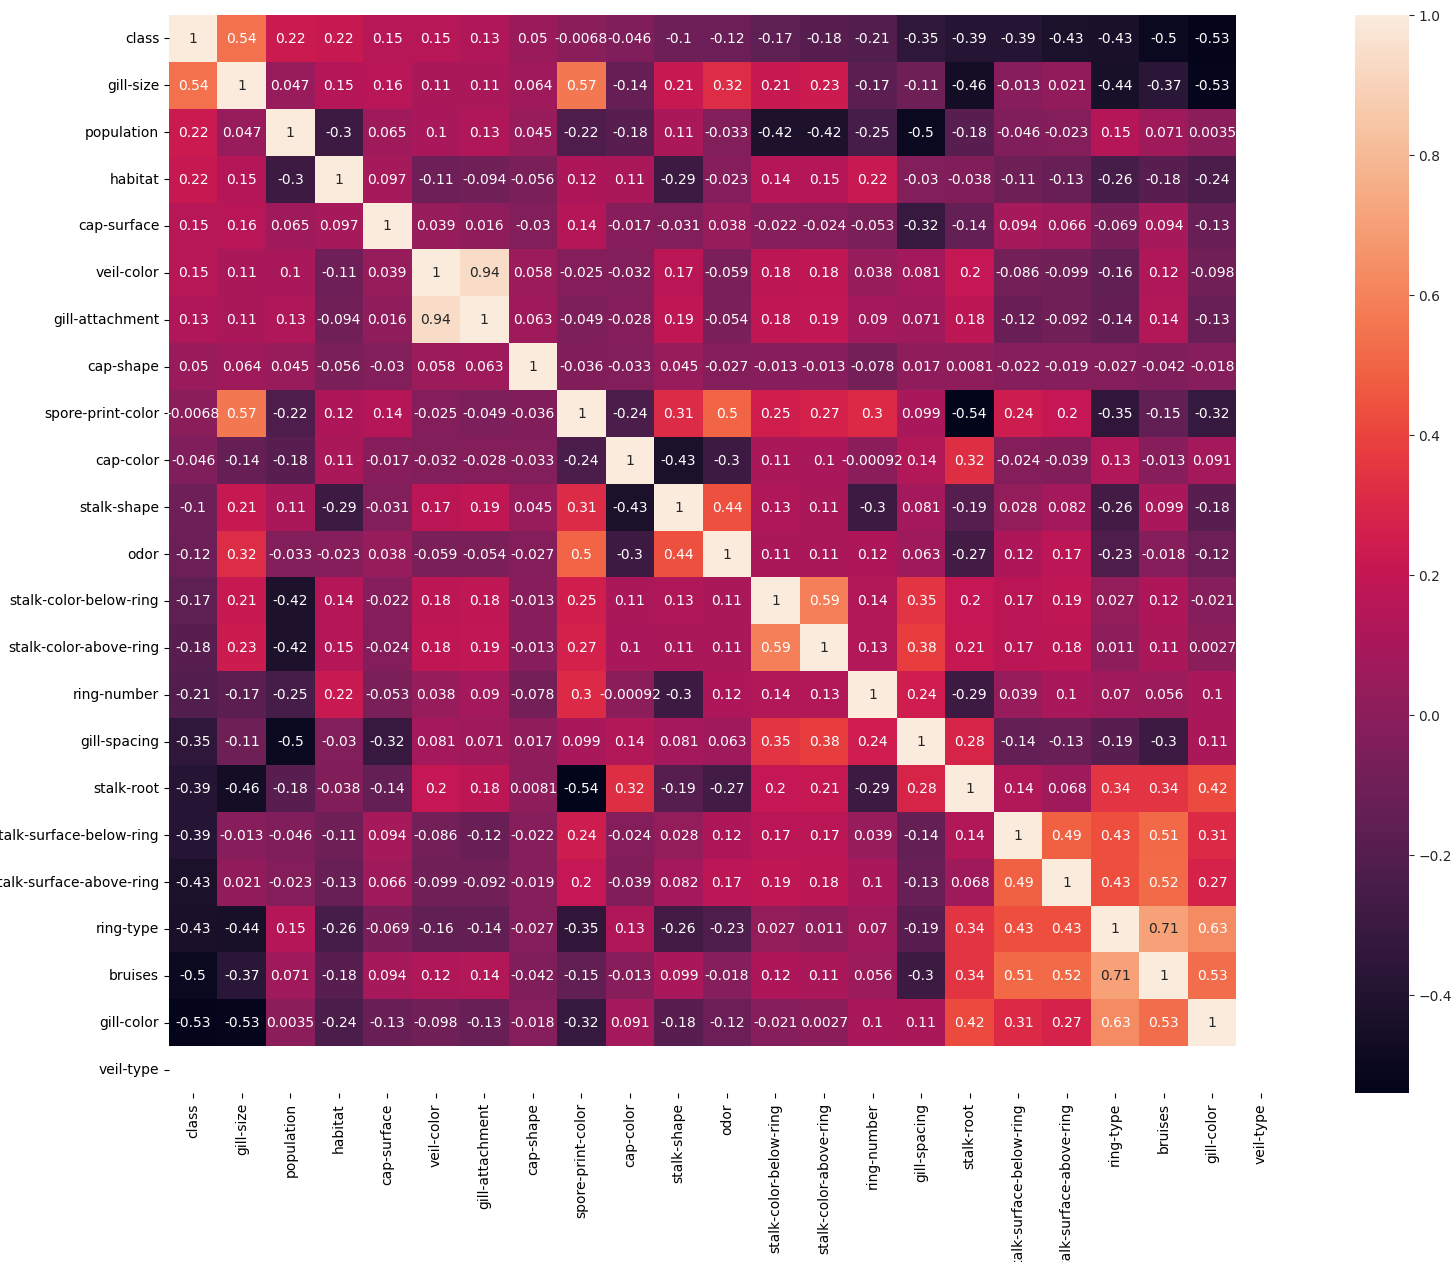

In [16]:
def label_encode_fit(data, columns):
    result = data.copy()
    encoders = {}
    for column in columns:
        encoder = LabelEncoder()
        result[column] = encoder.fit_transform(result[column])
        encoders[column] = encoder
    return result, encoders

data_encoded, encoders = label_encode_fit(data, data.columns)

def correlation_map(data, method):
    corr = data.corr(method)
    ix = corr.sort_values('class', ascending=False).index
    df_sorted_by_correlation = data.loc[:, ix]
    corr = df_sorted_by_correlation.corr(method)
    plt.subplots(figsize=(18,14))
    with sns.axes_style("white"):
        # display a correlation heatmap
        ax = sns.heatmap(corr, annot=True)
    plt.show()

correlation_map(data_encoded, method="spearman")

In [ ]:
# Gill_size should be included to the model as it has the highest correlation to class.
# Highly correlated variables such as, gill-color & ring-type, bruises & stalk-surface-below-ring 
# can be discarded to obtain more accurate results. It has nothing to do with Class.

In [17]:
# Select the features with highest mutual information scores
selector = SelectKBest(score_func=mutual_info_classif, k=10)
X_selected = selector.fit_transform(data_encoded.drop('class', axis=1), data_encoded['class'])

# Map the selected features back to the original feature names
selected_features = [column_names[i] for i in selector.get_support(indices=True)]

# Split the data into training and testing sets
X_train, X_test, Y_train , Y_test = train_test_split(X_selected, data_encoded['class'], train_size=0.8, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train and evaluate the models
log_model = LogisticRegression()
svm_model = SVC(C=1, kernel='rbf')
nn_model = MLPClassifier(hidden_layer_sizes=(128, 128))
log_model.fit(X_train, Y_train)
svm_model.fit(X_train, Y_train)
nn_model.fit(X_train, Y_train)
print(f"--- Logistic Regression: {log_model.score(X_test,Y_test)}")
print(f"Support Vector Machine : {svm_model.score(X_test,Y_test)}")
print(f"--------Neural Network : {nn_model.score(X_test,Y_test)}")

--- Logistic Regression: 0.8966153846153846
Support Vector Machine : 0.984
--------Neural Network : 1.0
